## **Loan Default Prediction — Data Science Workflow**

#### **1. Load the Datasets**

In [3]:
# Import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load datasets
perf_data = pd.read_csv("../pro_data_1.csv")
demo_data = pd.read_csv("../pro_data_2.csv")
prevloan_data = pd.read_csv("../pro_data_3.csv")

In [4]:
# Quick check of the first few rows

display(perf_data.head())

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [4]:
# Quick check of the first few rows

display(demo_data.head())

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [5]:
# Quick check of the first few rows

display(prevloan_data.head())

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [6]:
perf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [7]:
demo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [8]:
prevloan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [9]:
# Quick check of columns in each dataset

print(f"Columns of Dataset 1: {list(perf_data.columns)}")
print(f"Columns of Dataset 2: {list(demo_data.columns)}")
print(f"Columns of Dataset 3: {list(prevloan_data.columns)}")


Columns of Dataset 1: ['customerid', 'systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby', 'good_bad_flag']
Columns of Dataset 2: ['customerid', 'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps', 'bank_name_clients', 'bank_branch_clients', 'employment_status_clients', 'level_of_education_clients']
Columns of Dataset 3: ['customerid', 'systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate', 'referredby', 'firstduedate', 'firstrepaiddate']


In [10]:
# Column common to all three datasets

common_cols = set(perf_data.columns) & set(demo_data.columns) & set(prevloan_data.columns)
print(f"Common Columns: {list(common_cols)}")


Common Columns: ['customerid']


In [11]:
# Check of the shapes of the datasets and the number of unique customer IDs

print("Dataset Shapes:")
print("perf_data shape:", perf_data.shape)
print("demo_data shape:", demo_data.shape)
print("prevloan_data shape:", prevloan_data.shape)

print("\nUnique Customer IDs:")
print("perf_data UIDs:", len(perf_data.customerid.drop_duplicates().value_counts()))
print("demo_data UIDs:", len(demo_data.customerid.drop_duplicates().value_counts()))
print("prevloan_data UIDs:", len(prevloan_data.customerid.drop_duplicates().value_counts()))

Dataset Shapes:
perf_data shape: (4368, 10)
demo_data shape: (4346, 9)
prevloan_data shape: (18183, 12)

Unique Customer IDs:
perf_data UIDs: 4368
demo_data UIDs: 4334
prevloan_data UIDs: 4359


Shapes
- perf_data: 4,368 rows × 10 columns
- demo_data: 4,346 rows × 9 columns
- prevloan_data: 18,183 rows × 12 columns

Unique customer IDs
- Dataset 1: 4,368 unique IDs (no duplicates)
- Dataset 2: 4,334 unique IDs (12 duplicates removed)
- Dataset 3: 4,359 unique IDs (some customers appear multiple times — likely multiple transactions per customer)

**What this means for merging?**
- Dataset 3 clearly has repeat records for some customers (because 18,183 rows but only 4,359 unique customers). This suggests it might be transaction-level data rather than just one record per customer.
- Dataset 2 has fewer unique IDs than Dataset 1, so merging directly on customerid could cause row losses if we do an inner join.
- If you want all customers from all datasets, you’d need an outer join and handle missing values afterward.

<br>

#### **2. Clean and Aggregate Previous Loans Dataset (prevloans)**

In [12]:
prevloan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [13]:
prevloan_data.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays
count,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000
mean,3.018395e+08,4.189353,16501.237420,19573.202931,26.692790
std,9.367767e+04,3.249490,9320.547516,10454.245277,10.946556
min,3.016001e+08,1.000000,3000.000000,3450.000000,15.000000
25%,3.017766e+08,2.000000,10000.000000,11500.000000,15.000000
50%,3.018550e+08,3.000000,10000.000000,13000.000000,30.000000
75%,3.019197e+08,6.000000,20000.000000,24500.000000,30.000000
max,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000


In [14]:
prevloan_data.head(10)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000
5,8a858970548359cc0154883481981866,301832407,5,2017-03-06 13:25:17.000000,2017-03-06 12:25:10.000000,20000.0,23800.0,30,2017-04-04 15:46:56.000000,NaN,2017-04-05 00:00:00.000000,2017-04-04 15:31:47.000000
6,8a858970548359cc0154883481981866,301926513,8,2017-06-04 01:00:23.000000,2017-06-04 00:00:16.000000,30000.0,39000.0,60,2017-07-03 23:35:38.000000,NaN,2017-07-04 00:00:00.000000,2017-07-03 23:25:29.000000
7,8a8589f35451855401546b0738c42524,301912443,6,2017-05-18 09:42:18.000000,2017-05-18 08:41:12.000000,20000.0,24500.0,30,2017-06-19 10:10:35.000000,NaN,2017-06-19 00:00:00.000000,2017-06-19 10:00:21.000000
8,8a858e095c59b91b015c5e5cea3719bc,301936857,2,2017-06-13 08:26:31.000000,2017-06-13 07:26:24.000000,10000.0,13000.0,30,2017-07-10 13:32:03.000000,NaN,2017-07-13 00:00:00.000000,2017-07-10 13:21:53.000000
9,8a858e1158dc4d830158f7bde4f47ea7,301811291,3,2017-02-06 18:55:30.000000,2017-02-06 17:55:20.000000,10000.0,11500.0,15,2017-02-21 05:34:20.000000,NaN,2017-02-21 00:00:00.000000,2017-02-21 05:19:09.000000


In [15]:
prevloan_data.systemloanid.nunique()

18183

In [16]:
# assume df is your DataFrame with the columns provided
# ensure datetime columns are in datetime format

date_cols = ["approveddate", "creationdate", "closeddate", "firstduedate", "firstrepaiddate"]
prevloan_data[date_cols] = prevloan_data[date_cols].apply(pd.to_datetime, errors='coerce')

# group by customerid
def customer_features(group):
    group = group.sort_values("creationdate")  # ensure chronological order
    
    # loan growth trend (slope of loanamount over time)
    if len(group) > 1:
        x = np.arange(len(group))
        y = group["loanamount"].values
        slope = np.polyfit(x, y, 1)[0]  # linear regression slope
    else:
        slope = 0
    
    # repayment delay max
    repay_delay = (group["firstrepaiddate"] - group["firstduedate"]).dt.days
    max_delay = repay_delay.max() if not repay_delay.isna().all() else np.nan
    
    # time between loans avg (in months ~ days/30)
    if len(group) > 1:
        gaps = (
            group["creationdate"].iloc[1:].dt.normalize().reset_index(drop=True)
            - group["closeddate"].iloc[:-1].dt.normalize().reset_index(drop=True)
        ).dt.days

        gaps = gaps.dropna()
        #gaps = gaps.clip(lower=0)  # ensure no negatives

        avg_gap = gaps.mean()
    else:
        avg_gap = 0


    
    return pd.Series({
        "no_total_loans": group["systemloanid"].nunique(),
        "first_creation_date": group["creationdate"].min(),
        "last_loan_date": group["closeddate"].max(),
        "last_loan_amount": float(f"{group.loc[group['creationdate'].idxmax(), 'loanamount']:.2f}"),  
        "avg_amount": float(f"{group['loanamount'].mean():.2f}"),
        "std_amount": float(f"{group['loanamount'].std(ddof=0) or 0:.2f}"),
        "avg_total_due": float(f"{group["totaldue"].mean():.2f}"),
        "avg_term_days": group["termdays"].mean(),
        "std_term_days": float(f"{group['termdays'].std(ddof=0) or 0:.2f}"), 
        "avg_approval_time": ((group["approveddate"] - group["creationdate"]).dt.days).mean(),
        "avg_payout_time": ((group["closeddate"] - group["approveddate"]).dt.days).mean(),
        "prct_duedate_default": (repay_delay > 0).mean(),
        "loan_growth_trend": float(f"{slope:.4f}"),
        "max_repay_delay": max(0, max_delay),
        "avg_loan_gap": float(f"{avg_gap:.4f}"),
    })



prevloan_sum = prevloan_data.groupby("customerid").apply(customer_features).reset_index()


C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_29632\1241960080.py:59: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prevloan_sum = prevloan_data.groupby("customerid").apply(customer_features).reset_index()


In [17]:
prevloan_sum.head(10)

,customerid,no_total_loans,first_creation_date,last_loan_date,last_loan_amount,avg_amount,std_amount,avg_total_due,avg_term_days,std_term_days,avg_approval_time,avg_payout_time,prct_duedate_default,loan_growth_trend,max_repay_delay,avg_loan_gap
0,8a1088a0484472eb01484669e3ce4e0b,1,2017-07-02 18:17:53,2017-07-24 20:50:43,10000.0,10000.00,0.00,11500.00,15.000000,0.00,0.0,22.000000,1.000000,0.0000,6,0.0000
1,8a1a1e7e4f707f8b014f797718316cad,4,2016-05-13 14:29:31,2017-07-26 19:48:11,30000.0,17500.00,8291.56,22375.00,37.500000,12.99,0.0,31.250000,0.250000,7000.0000,1,104.0000
2,8a1a32fc49b632520149c3b8fdf85139,7,2016-03-23 13:21:20,2017-07-13 18:45:26,20000.0,12857.14,4517.54,15214.29,19.285714,6.78,0.0,18.285714,0.142857,1785.7143,1,57.3333
3,8a1eb5ba49a682300149c3c068b806c7,8,2016-11-02 10:52:07,2017-07-12 13:02:44,30000.0,16250.00,6959.71,20300.00,33.750000,9.92,0.0,28.500000,0.125000,2738.0952,8,3.2857
4,8a1edbf14734127f0147356fdb1b1eb2,2,2017-05-17 11:48:20,2017-06-27 18:13:52,10000.0,10000.00,0.00,12250.00,22.500000,7.50,0.0,18.000000,0.000000,-0.0000,0,4.0000
5,8a26bd845089f1d7015090b1d6f53bad,9,2016-05-13 12:40:21,2017-07-26 18:49:03,20000.0,13333.33,4714.05,16338.89,26.666667,6.24,0.0,30.666667,0.444444,1166.6667,30,19.8750
6,8a2a81a74ce8c05d014cfb32a0da1049,11,2016-08-09 21:56:47,2017-07-25 08:14:36,20000.0,18181.82,5749.60,22081.82,30.000000,0.00,0.0,29.454545,0.272727,454.5455,39,2.0000
7,8a2ac4745091002b0150a144bcbe58b7,7,2016-06-05 16:01:32,2017-07-30 09:12:16,40000.0,22857.14,10301.58,27857.14,42.857143,14.85,0.0,38.000000,0.000000,5000.0000,0,25.1667
8,8a2ad9ce4c453e06014c4b3175e52407,1,2017-06-15 14:29:51,2017-07-14 15:32:09,20000.0,20000.00,0.00,24500.00,30.000000,0.00,0.0,29.000000,0.000000,0.0000,0,0.0000
9,8a33a06e4a5075c2014a5295aa0c2224,8,2016-11-25 19:15:47,2017-07-18 17:15:18,20000.0,12500.00,4330.13,15500.00,26.250000,6.50,0.0,25.375000,0.375000,1428.5714,16,4.0000


In [18]:
prevloan_sum.avg_loan_gap.describe()

count    4359.000000
mean       10.338722
std        29.395298
min         0.000000
25%         0.000000
50%         1.250000
75%         8.500000
max       439.000000
Name: avg_loan_gap, dtype: float64

In [19]:
#prevloan_data[prevloan_data["customerid"] == "8a2ad9ce4c453e06014c4b3175e52407"].head(10)

#prevloan_sum[prevloan_sum["avg_time_btwn_loans"] == 0].head(10)
#prevloan_sum[prevloan_sum["avg_time_btwn_loans"] == -1].head(10)
#prevloan_data[prevloan_data["customerid"] == "8a8588235375c27f01537f79100c40c3"].head(10)
prevloan_data[prevloan_data["customerid"] == "8a8588235384a58d01538b5b8d49372c"].head(10)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
4086,8a8588235384a58d01538b5b8d49372c,301949231,2,2017-06-23 14:24:23,2017-06-23 13:24:15,10000.0,13000.0,30,2017-07-17 07:33:21,NaN,2017-07-24,2017-07-17 07:23:12
4140,8a8588235384a58d01538b5b8d49372c,301933181,1,2017-06-09 20:11:14,2017-06-09 19:10:06,10000.0,13000.0,30,2017-06-23 14:09:46,NaN,2017-07-11,2017-06-23 13:59:37


In [20]:
prevloan_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customerid            4359 non-null   object        
 1   no_total_loans        4359 non-null   int64         
 2   first_creation_date   4359 non-null   datetime64[ns]
 3   last_loan_date        4359 non-null   datetime64[ns]
 4   last_loan_amount      4359 non-null   float64       
 5   avg_amount            4359 non-null   float64       
 6   std_amount            4359 non-null   float64       
 7   avg_total_due         4359 non-null   float64       
 8   avg_term_days         4359 non-null   float64       
 9   std_term_days         4359 non-null   float64       
 10  avg_approval_time     4359 non-null   float64       
 11  avg_payout_time       4359 non-null   float64       
 12  prct_duedate_default  4359 non-null   float64       
 13  loan_growth_trend 

In [21]:
prevloan_sum.describe()

,no_total_loans,first_creation_date,last_loan_date,last_loan_amount,avg_amount,std_amount,avg_total_due,avg_term_days,std_term_days,avg_approval_time,avg_payout_time,prct_duedate_default,loan_growth_trend,max_repay_delay,avg_loan_gap
count,4359.000000,4359,4359,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000
mean,4.171370,2017-02-14 23:27:42.904335616,2017-07-02 21:30:46.094057984,16455.609085,12909.505655,2677.569892,15639.865609,25.339400,3.477944,0.000688,22.732647,0.184671,1070.473431,4.850883,10.338722
min,1.000000,2016-01-15 07:53:17,2016-02-09 00:05:50,5000.000000,5000.000000,0.000000,5750.000000,15.000000,0.000000,0.000000,0.000000,0.000000,-357.142900,0.000000,0.000000
25%,1.000000,2016-11-14 21:54:22.500000,2017-07-03 05:40:21,10000.000000,10000.000000,0.000000,12250.000000,20.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2017-04-16 21:16:03,2017-07-10 12:23:49,10000.000000,10000.000000,0.000000,13000.000000,27.857143,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,1.250000
75%,6.000000,2017-06-08 16:33:10.500000,2017-07-20 09:39:09,20000.000000,14285.710000,4948.720000,17300.000000,30.000000,7.070000,0.000000,28.500000,0.285714,2500.000000,4.000000,8.500000
max,26.000000,2017-07-28 09:46:34,2017-07-30 22:09:11,60000.000000,36666.670000,17083.230000,41252.380000,60.000000,29.050000,1.000000,151.000000,1.000000,15000.000000,351.000000,439.000000
std,3.654823,NaN,NaN,10113.957844,4819.318255,3808.844946,5379.848926,6.866877,4.858908,0.018630,9.403757,0.300912,1558.272502,13.765100,29.395298


- Check for duplicates

In [22]:
# Function to check duplicates
def check_duplicates(df, name):
    duplicate_mask = df.duplicated(subset='customerid', keep=False)
    duplicates = df[duplicate_mask]
    num_duplicates = duplicates.shape[0]
    print(f"{name} - Number of duplicate rows: {num_duplicates}")
    #display(duplicates)

# Check duplicates in each dataset
check_duplicates(perf_data, "perf_data")
check_duplicates(demo_data, "demo_data")
check_duplicates(prevloan_data, "prevloan_data")


perf_data - Number of duplicate rows: 0
demo_data - Number of duplicate rows: 24
prevloan_data - Number of duplicate rows: 16790


In [23]:
# Check for exact duplicate rows
exact_duplicates = demo_data[demo_data.duplicated(keep=False)]

# Number of exact duplicate rows
num_exact_duplicates = exact_duplicates.shape[0]
print(f"Number of exact duplicate rows in demo_data: {num_exact_duplicates}")

# Show the sorted first 6 exact duplicate rows
display(exact_duplicates.sort_values(by=exact_duplicates.columns.tolist()).head(6))


Number of exact duplicate rows in demo_data: 24


,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
1414,8a858e625c8d993a015c938f829f77ee,1988-12-20 00:00:00.000000,Savings,5.768333,5.561992,First Bank,NaN,Permanent,NaN
1928,8a858e625c8d993a015c938f829f77ee,1988-12-20 00:00:00.000000,Savings,5.768333,5.561992,First Bank,NaN,Permanent,NaN
445,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,NaN,Permanent,NaN
1090,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,NaN,Permanent,NaN
1520,8a858ec65cc6352b015cc64525ea0763,1985-01-30 00:00:00.000000,Savings,3.845728,7.411737,GT Bank,NaN,Permanent,NaN
1996,8a858ec65cc6352b015cc64525ea0763,1985-01-30 00:00:00.000000,Savings,3.845728,7.411737,GT Bank,NaN,Permanent,NaN


<br>

#### **3. Merge the 3 Datasets into 1**

- Merge the 'perf_data' and 'demo_data' datasets

In [24]:
# Drop exact duplicate rows in demo_data, keeping the first occurrence
demo_data = demo_data.drop_duplicates(keep='first')

# Merge loan info with customer profile
loan_customer_df = pd.merge(perf_data, demo_data, on="customerid", how="left")
print("Final merged shape:", loan_customer_df.shape)

display(loan_customer_df.head())



Final merged shape: (4368, 18)


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


In [25]:
# Step 2: Merge with prevloan_sum on customerid
loan_data = pd.merge(loan_customer_df, prevloan_sum, on="customerid", how="left")

print("Final merged shape:", loan_data.shape)
display(loan_data.head())


Final merged shape: (4368, 33)


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,std_amount,avg_total_due,avg_term_days,std_term_days,avg_approval_time,avg_payout_time,prct_duedate_default,loan_growth_trend,max_repay_delay,avg_loan_gap
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,...,5749.60,22081.82,30.0,0.00,0.0,29.454545,0.272727,454.5455,39.0,2.0000
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,...,0.00,11750.00,17.5,5.59,0.0,18.166667,0.166667,0.0000,30.0,9.4000
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,...,0.00,12250.00,22.5,7.50,0.0,31.500000,1.000000,-0.0000,11.0,1.0000
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,...,7806.25,23550.00,37.5,12.99,0.0,27.000000,0.000000,3214.2857,0.0,13.2857


In [26]:
# Check duplicates in loan_data

dup_loan = loan_data['customerid'].duplicated().sum()
print(f"Duplicate customerid in loan_data: {dup_loan}")

Duplicate customerid in loan_data: 0


In [27]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   systemloanid                4368 non-null   int64         
 2   loannumber                  4368 non-null   int64         
 3   approveddate                4368 non-null   object        
 4   creationdate                4368 non-null   object        
 5   loanamount                  4368 non-null   float64       
 6   totaldue                    4368 non-null   float64       
 7   termdays                    4368 non-null   int64         
 8   referredby                  587 non-null    object        
 9   good_bad_flag               4368 non-null   object        
 10  birthdate                   3269 non-null   object        
 11  bank_account_type           3269 non-null   object      

In [28]:
loan_data.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps,no_total_loans,first_creation_date,last_loan_date,...,std_amount,avg_total_due,avg_term_days,std_term_days,avg_approval_time,avg_payout_time,prct_duedate_default,loan_growth_trend,max_repay_delay,avg_loan_gap
count,4.368000e+03,4368.000000,4368.000000,4368.000000,4368.000000,3269.000000,3269.000000,4359.000000,4359,4359,...,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000
mean,3.019810e+08,5.172390,17809.065934,21257.377679,29.261676,4.530975,7.290383,4.171370,2017-02-14 23:27:42.904335616,2017-07-02 21:30:46.094058240,...,2677.569892,15639.865609,25.339400,3.477944,0.000688,22.732647,0.184671,1070.473431,4.850883,10.338722
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,-118.247009,-33.868818,1.000000,2016-01-15 07:53:17,2016-02-09 00:05:50,...,0.000000,5750.000000,15.000000,0.000000,0.000000,0.000000,0.000000,-357.142900,0.000000,0.000000
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000,3.354842,6.473645,1.000000,2016-11-14 21:54:22.500000,2017-07-03 05:40:21,...,0.000000,12250.000000,20.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,3.584222,6.625681,3.000000,2017-04-16 21:16:03,2017-07-10 12:23:49,...,0.000000,13000.000000,27.857143,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,1.250000
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,6.439855,7.426745,6.000000,2017-06-08 16:33:10.500000,2017-07-20 09:39:09,...,4948.720000,17300.000000,30.000000,7.070000,0.000000,28.500000,0.285714,2500.000000,4.000000,8.500000
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069,26.000000,2017-07-28 09:46:34,2017-07-30 22:09:11,...,17083.230000,41252.380000,60.000000,29.050000,1.000000,151.000000,1.000000,15000.000000,351.000000,439.000000
std,1.343115e+04,3.653569,10749.694571,11943.510416,11.512519,7.925454,3.269601,3.654823,NaN,NaN,...,3808.844946,5379.848926,6.866877,4.858908,0.018630,9.403757,0.300912,1558.272502,13.765100,29.395298


<br>

#### **4. Data Cleaning**

In [29]:
# Changing columns to proper format
date_cols = ["approveddate", "creationdate", "birthdate", "closeddate", "firstduedate", "firstrepaiddate"]
for col in date_cols:
    if col in loan_data.columns:
        loan_data[col] = pd.to_datetime(loan_data[col], errors="coerce")


loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   systemloanid                4368 non-null   int64         
 2   loannumber                  4368 non-null   int64         
 3   approveddate                4368 non-null   datetime64[ns]
 4   creationdate                4368 non-null   datetime64[ns]
 5   loanamount                  4368 non-null   float64       
 6   totaldue                    4368 non-null   float64       
 7   termdays                    4368 non-null   int64         
 8   referredby                  587 non-null    object        
 9   good_bad_flag               4368 non-null   object        
 10  birthdate                   3269 non-null   datetime64[ns]
 11  bank_account_type           3269 non-null   object      

In [30]:
# Check for missing values
loan_data.isnull().sum()


customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    3781
good_bad_flag                    0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           4335
employment_status_clients     1592
level_of_education_clients    3925
no_total_loans                   9
first_creation_date              9
last_loan_date                   9
last_loan_amount                 9
avg_amount                       9
std_amount                       9
avg_total_due                    9
avg_term_days                    9
std_term_days                    9
avg_approval_time                9
avg_payout_time     

In [31]:
loan_data[["referredby", "birthdate", "bank_account_type", "longitude_gps", "latitude_gps", "bank_name_clients", "bank_branch_clients",
           "employment_status_clients", "level_of_education_clients"]].head()

,referredby,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,NaN,1972-01-15,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,NaN,1985-08-23,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,NaN,1984-09-18,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,NaN,1977-10-10,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,NaN,1986-09-07,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


In [32]:
#Problematic Columns Summary

loan_data[["referredby", "birthdate", "bank_account_type", "longitude_gps", "latitude_gps", "bank_name_clients", "bank_branch_clients",
           "employment_status_clients", "level_of_education_clients"]].isnull().sum()

referredby                    3781
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           4335
employment_status_clients     1592
level_of_education_clients    3925
dtype: int64

##### **i. Engineer "referredby" column**

In [33]:
# Engineer "referredby" column to a boolean column with True if "referredby" is not null, else False

loan_data["referred"] = loan_data["referredby"].notna().astype(int)
loan_data.iloc[16:26][["referred", "referredby"]]



,referred,referredby
16,0,NaN
17,1,8a858ef458d4a52e0158d858eb5d6456
18,0,NaN
19,0,NaN
20,1,8a858ff85bd93919015bda56605652bd
21,1,8a858e495d1e235c015d30d5ddb42149
22,0,NaN
23,0,NaN
24,0,NaN
25,0,NaN


##### **ii. Engineer "birthdate" column**

In [34]:
# Engineer "birthdate" to "age" column
loan_data["age"] = (pd.to_datetime("today") - loan_data["birthdate"]).dt.days // 365

# Fill missing age values with the median age
median_age = loan_data["age"].median()
loan_data["age"] = loan_data["age"].fillna(median_age)

loan_data[["age", "birthdate"]].head(10)

,age,birthdate
0,53.0,1972-01-15
1,40.0,1985-08-23
2,40.0,1984-09-18
3,47.0,1977-10-10
4,39.0,1986-09-07
5,40.0,NaT
6,36.0,1989-05-29
7,37.0,1987-09-20
8,38.0,1987-06-09
9,40.0,1984-12-10


##### **iii. Fill Bank Account Type Blanks**

In [35]:
# Fill NaN bank account types with "Unknown"

loan_data["bank_account_type"] = loan_data["bank_account_type"].fillna("Unknown")
loan_data.bank_account_type.value_counts()

bank_account_type
Savings    2570
Unknown    1099
Other       653
Current      46
Name: count, dtype: int64

##### **iv. Engineer Longitude and Latitude to Categorical Locations**

In [36]:
loan_data[["longitude_gps", "latitude_gps"]].head(10)

,longitude_gps,latitude_gps
0,3.432010,6.433055
1,3.885298,7.320700
2,11.139350,10.292041
3,3.985770,7.491708
4,7.457913,9.076574
5,NaN,NaN
6,3.259444,6.557011
7,6.178056,5.425800
8,3.396524,6.627943
9,3.285872,6.582444


- Get Nigerian locations from GADM Shapefiles

In [37]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load Nigeria state shapefile
#states = gpd.read_file("gadm41_NGA_1.shp")
states = gpd.read_file("gps_shp_docs/gadm41_NGA_1.shp")

# Check which column has state names
# print(states.columns)
# Usually it's 'NAME_1'

# Convert all rows of loan_data to GeoDataFrame
geometry = [Point(xy) if not pd.isna(xy[0]) and not pd.isna(xy[1]) else None
            for xy in zip(loan_data['longitude_gps'], loan_data['latitude_gps'])]
geo_df = gpd.GeoDataFrame(loan_data[["customerid", "latitude_gps", "longitude_gps"]], geometry=geometry, crs="EPSG:4326")

# Ensure CRS matches
states = states.to_crs("EPSG:4326")

# Spatial join to get state names
geo_df = gpd.sjoin(geo_df, states[['NAME_1','geometry']], how='left', predicate='within')

# Clean up
geo_df = geo_df.drop(columns=['index_right'], errors='ignore')
geo_df.rename(columns={'NAME_1':'state'}, inplace=True)
geo_df['country'] = geo_df['state'].apply(lambda x: 'Nigeria' if pd.notna(x) else None)

# Result
geo_df[['customerid', 'latitude_gps','longitude_gps','state','country']].head(10)


,customerid,latitude_gps,longitude_gps,state,country
0,8a2a81a74ce8c05d014cfb32a0da1049,6.433055,3.432010,Lagos,Nigeria
1,8a85886e54beabf90154c0a29ae757c0,7.320700,3.885298,Oyo,Nigeria
2,8a8588f35438fe12015444567666018e,10.292041,11.139350,Gombe,Nigeria
3,8a85890754145ace015429211b513e16,7.491708,3.985770,Oyo,Nigeria
4,8a858970548359cc0154883481981866,9.076574,7.457913,Federal Capital Territory,Nigeria
5,8a8589f35451855401546b0738c42524,NaN,NaN,NaN,None
6,8a858e095c59b91b015c5e5cea3719bc,6.557011,3.259444,Lagos,Nigeria
7,8a858e1158dc4d830158f7bde4f47ea7,5.425800,6.178056,Delta,Nigeria
8,8a858e185b4923b4015b4ae48d28646a,6.627943,3.396524,Lagos,Nigeria
9,8a858e1d5cd58f9e015ceda4bdb63673,6.582444,3.285872,Lagos,Nigeria


In [38]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4368 entries, 0 to 4367
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customerid     4368 non-null   object  
 1   latitude_gps   3269 non-null   float64 
 2   longitude_gps  3269 non-null   float64 
 3   geometry       3269 non-null   geometry
 4   state          3232 non-null   object  
 5   country        3232 non-null   object  
dtypes: float64(2), geometry(1), object(3)
memory usage: 238.9+ KB


In [39]:
# Locations probably outside Nigeria
print(f"Number of locations probably outside Nigeria:", int(((geo_df['state'].isna()) & (geo_df['latitude_gps'].notna())).sum()))

#The first 10 rows of locations probably outside Nigeria
print("\nThe first 10 rows of locations probably outside Nigeria:")
geo_df[(geo_df['state'].isna()) & (geo_df['latitude_gps'].notna())][['latitude_gps','longitude_gps', 'state', 'country']].head(5)


Number of locations probably outside Nigeria: 37

The first 10 rows of locations probably outside Nigeria:


,latitude_gps,longitude_gps,state,country
60,56.464013,-2.979950,NaN,None
313,11.257169,14.130563,NaN,None
527,29.425541,-98.495394,NaN,None
531,4.732513,7.076568,NaN,None
547,54.593071,-3.560050,NaN,None


- Manually impute 5 Nigerian states not gotten from the Shape files

In [40]:
# Manual impute location of places in Nigeria's latitude and longitude range

# Boolean mask for points inside Nigeria
in_nigeria_bbox = (
    (geo_df['latitude_gps'] >= 4) &
    (geo_df['latitude_gps'] <= 14) &
    (geo_df['longitude_gps'] >= 3) &
    (geo_df['longitude_gps'] <= 15)
)

# Filter points inside Nigeria but with missing state
missing_state_in_nigeria = geo_df[(geo_df['state'].isna()) & in_nigeria_bbox][
    ['latitude_gps','longitude_gps','state','country']
]

print("Number of points inside Nigeria with missing state:", len(missing_state_in_nigeria))
print(missing_state_in_nigeria)



Number of points inside Nigeria with missing state: 5
      latitude_gps  longitude_gps state country
313      11.257169      14.130563   NaN    None
531       4.732513       7.076568   NaN    None
2013      4.505915       5.725238   NaN    None
2213     13.988297       5.396704   NaN    None
3490      6.419233       3.410042   NaN    None


In [41]:
# Dictionary of coordinates to states
manual_states = {
    (11.257169, 14.130563): 'Borno',
    (4.732513, 7.076568): 'Rivers',
    (4.505915, 5.725238): 'Bayelsa',
    (13.988297, 5.396704): 'Niger',
    (6.419233, 3.410042): 'Lagos'
}

# Function to find manual state with tolerance
def get_manual_state(lat, lon, tol=1e-4):
    for (m_lat, m_lon), state in manual_states.items():
        if abs(lat - m_lat) < tol and abs(lon - m_lon) < tol:
            return state
    return None

# Updated fill function using tolerance
def fill_state_country(row):
    if pd.notna(row['state']):
        # Already filled from shapefile
        return row['state'], row['country']
    elif pd.notna(row['latitude_gps']) and pd.notna(row['longitude_gps']):
        # Check manual imputation with tolerance
        manual_state = get_manual_state(row['latitude_gps'], row['longitude_gps'])
        if manual_state:
            return manual_state, 'Nigeria'
        else:
            return 'Abroad', 'Abroad'
    else:
        return None, None

# Apply to the entire GeoDataFrame
geo_df[['state','country']] = geo_df.apply(lambda row: pd.Series(fill_state_country(row)), axis=1)

# Check the manually imputed rows
manual_check = geo_df[
    geo_df.apply(lambda row: get_manual_state(row['latitude_gps'], row['longitude_gps']) is not None, axis=1)
][['latitude_gps','longitude_gps','state','country']]

manual_check


,latitude_gps,longitude_gps,state,country
313,11.257169,14.130563,Borno,Nigeria
531,4.732513,7.076568,Rivers,Nigeria
2013,4.505915,5.725238,Bayelsa,Nigeria
2213,13.988297,5.396704,Niger,Nigeria
3490,6.419233,3.410042,Lagos,Nigeria


In [42]:
# Using iloc to get rows 1100 to 1110 (exclusive of 1110)

rows = np.r_[55:61, 313, 1801:1805]  # np.r_ combines ranges
geo_df.iloc[rows][['customerid', 'latitude_gps','longitude_gps','state','country']]

# geo_df[geo_df['state'] == 'Abroad'][['latitude_gps','longitude_gps','state','country']].head(10)


,customerid,latitude_gps,longitude_gps,state,country
55,8a858fcb5ca240f7015ca64a71fa1951,7.307713,3.871028,Oyo,Nigeria
56,8a858fd45a4260bc015a42ac9e89278d,NaN,NaN,None,None
57,8a858fd95c3b5bca015c3fcc0b374c3e,8.996616,7.484739,Federal Capital Territory,Nigeria
58,8a85882953bc04f80153c205b75d7403,6.509414,3.342768,Lagos,Nigeria
59,8a8588dc536a14130153753dc8d32698,6.825786,3.433903,Ogun,Nigeria
60,8a8588fd53c244bc0153c8305ea7338f,56.464013,-2.979950,Abroad,Abroad
313,8a8588dc5384a05f0153982119c81a51,11.257169,14.130563,Borno,Nigeria
1801,8a858e9f5b8a8db1015b8a91d6a3058c,7.308337,6.097214,Edo,Nigeria
1802,8a858eb95b8c2f6e015b8cb299b128a0,6.666385,3.290196,Lagos,Nigeria
1803,8a858ec9590ad35d01592fc002540aa9,6.484460,3.355208,Lagos,Nigeria


In [43]:
# Save location dataset to CSV
# geo_df[['latitude_gps', 'longitude_gps', 'state', 'country']].to_csv("saved_docs/locations.csv", index=False)

- Lookup location from geo_df for loan_data

In [44]:
# Method 1: Count duplicate rows of customerid
print("Duplicate customerid entries")
print("geo_df: ", geo_df['customerid'].duplicated().sum())
print("loan_data: ", loan_data['customerid'].duplicated().sum())

# Method 2: Count unique customerids that are duplicated
print("\nNumber of duplicated unique customerids")
print("geo_df: ", geo_df['customerid'][geo_df['customerid'].duplicated()].nunique())
print("loan_data: ", loan_data['customerid'][loan_data['customerid'].duplicated()].nunique())


Duplicate customerid entries
geo_df:  0
loan_data:  0

Number of duplicated unique customerids
geo_df:  0
loan_data:  0


In [45]:
# Merge state and country from geo_df

loan_data = loan_data.merge(
    geo_df[['customerid','state']],
    left_on=['customerid'],
    right_on=['customerid'],
    how='left'
)

# Drop temporary rounded columns if you want
#loan_data.drop(columns=['latitude_gps', 'longitude_gps', 'latitude_gps_r','longitude_gps_r'], inplace=True)

# Fill NaN states with 'Unknown'
loan_data['state'] = loan_data['state'].fillna('Unknown')

loan_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,std_term_days,avg_approval_time,avg_payout_time,prct_duedate_default,loan_growth_trend,max_repay_delay,avg_loan_gap,referred,age,state
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,...,0.00,0.0,29.454545,0.272727,454.5455,39.0,2.0000,0,53.0,Lagos
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,40.0,Oyo
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,...,5.59,0.0,18.166667,0.166667,0.0000,30.0,9.4000,0,40.0,Gombe
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,...,7.50,0.0,31.500000,1.000000,-0.0000,11.0,1.0000,0,47.0,Oyo
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,...,12.99,0.0,27.000000,0.000000,3214.2857,0.0,13.2857,0,39.0,Federal Capital Territory


In [46]:
loan_data.state.value_counts().head()


state
Lagos                        1447
Unknown                      1099
Federal Capital Territory     280
Oyo                           267
Ogun                          258
Name: count, dtype: int64

##### **v. Fill Bank Name and Bank Client Blanks**

In [47]:
loan_data[["bank_account_type", "bank_name_clients", "bank_branch_clients"]].info()
loan_data[["bank_account_type", "bank_name_clients", "bank_branch_clients"]].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bank_account_type    4368 non-null   object
 1   bank_name_clients    3269 non-null   object
 2   bank_branch_clients  33 non-null     object
dtypes: object(3)
memory usage: 102.5+ KB


,bank_account_type,bank_name_clients,bank_branch_clients
0,Other,Diamond Bank,NaN
1,Savings,GT Bank,"DUGBE,IBADAN"
2,Other,EcoBank,NaN
3,Savings,First Bank,NaN
4,Other,GT Bank,NaN


In [48]:
# Fill bank name clients NaN with Unknown

loan_data["bank_name_clients"] = loan_data["bank_name_clients"].fillna("Unknown")
loan_data.bank_name_clients.value_counts().head()


bank_name_clients
GT Bank        1207
Unknown        1099
First Bank      430
Access Bank     328
UBA             267
Name: count, dtype: int64

##### **vi. Fill Employment Status Blanks**

In [49]:
# loan_data[["employment_status_clients", "level_of_education_clients"]].value_counts()
print("Employment Status Clients Info:")
loan_data["employment_status_clients"].info()

print("\nLevel of Education Clients Info:")
loan_data["level_of_education_clients"].info()

Employment Status Clients Info:
<class 'pandas.core.series.Series'>
RangeIndex: 4368 entries, 0 to 4367
Series name: employment_status_clients
Non-Null Count  Dtype 
--------------  ----- 
2776 non-null   object
dtypes: object(1)
memory usage: 34.3+ KB

Level of Education Clients Info:
<class 'pandas.core.series.Series'>
RangeIndex: 4368 entries, 0 to 4367
Series name: level_of_education_clients
Non-Null Count  Dtype 
--------------  ----- 
443 non-null    object
dtypes: object(1)
memory usage: 34.3+ KB


In [50]:
# Fill Blanks in Employment with Unknown

loan_data["employment_status_clients"] = loan_data["employment_status_clients"].fillna("Unknown")
loan_data.employment_status_clients.value_counts().head()


employment_status_clients
Permanent        2340
Unknown          1592
Self-Employed     277
Student           111
Unemployed         43
Name: count, dtype: int64

##### **vii. Missing values from prevloans dataset**

- Fill values with median

In [51]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   systemloanid                4368 non-null   int64         
 2   loannumber                  4368 non-null   int64         
 3   approveddate                4368 non-null   datetime64[ns]
 4   creationdate                4368 non-null   datetime64[ns]
 5   loanamount                  4368 non-null   float64       
 6   totaldue                    4368 non-null   float64       
 7   termdays                    4368 non-null   int64         
 8   referredby                  587 non-null    object        
 9   good_bad_flag               4368 non-null   object        
 10  birthdate                   3269 non-null   datetime64[ns]
 11  bank_account_type           4368 non-null   object      

In [52]:
missing_cols = [
    "no_total_loans", "first_creation_date", "last_loan_date",
    "last_loan_amount", "avg_amount", "std_amount", "avg_total_due",
    "avg_term_days", "std_term_days", "avg_approval_time", "avg_payout_time",
    "prct_duedate_default", "loan_growth_trend", "max_repay_delay", "avg_loan_gap"
]

# filter rows where any of these columns is missing
loan_data.loc[
    loan_data[missing_cols].isna().any(axis=1),
    ["customerid"] + missing_cols
]


,customerid,no_total_loans,first_creation_date,last_loan_date,last_loan_amount,avg_amount,std_amount,avg_total_due,avg_term_days,std_term_days,avg_approval_time,avg_payout_time,prct_duedate_default,loan_growth_trend,max_repay_delay,avg_loan_gap
1,8a85886e54beabf90154c0a29ae757c0,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,8a76e7d443e6e97c0143ed0a13cb4f61,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2221,8a858e4357be1daf0157c96f4c915ef0,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2949,8a858fda56562f8f01565f928f516cea,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3262,8a5cfa8345d40fb80145dc328532397a,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3389,8a858f6f57d2acb50157dca4f81540e2,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3686,8a858ecc57b9184b0157c4ffc1b80614,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3776,8a858f9d5668e3f1015679951579076f,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3849,8a858e69566ae5b801567ac352d84477,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Step 1: Find rows that had NaNs before filling
rows_with_missing = loan_data[missing_cols].isna().any(axis=1)

# Step 2: Fill NaNs with median
loan_data[missing_cols] = loan_data[missing_cols].fillna(
    loan_data[missing_cols].median()
)

# Step 3: Return those rows (after filling)
print("Rows with missing values before filling:")
loan_data.loc[rows_with_missing, ["customerid"] + missing_cols]



Rows with missing values before filling:


,customerid,no_total_loans,first_creation_date,last_loan_date,last_loan_amount,avg_amount,std_amount,avg_total_due,avg_term_days,std_term_days,avg_approval_time,avg_payout_time,prct_duedate_default,loan_growth_trend,max_repay_delay,avg_loan_gap
1,8a85886e54beabf90154c0a29ae757c0,3.0,2017-04-16 21:16:03,2017-07-10 12:23:49,10000.0,10000.0,0.0,13000.0,27.857143,0.0,0.0,23.0,0.0,0.0,0.0,1.25
303,8a76e7d443e6e97c0143ed0a13cb4f61,3.0,2017-04-16 21:16:03,2017-07-10 12:23:49,10000.0,10000.0,0.0,13000.0,27.857143,0.0,0.0,23.0,0.0,0.0,0.0,1.25
2221,8a858e4357be1daf0157c96f4c915ef0,3.0,2017-04-16 21:16:03,2017-07-10 12:23:49,10000.0,10000.0,0.0,13000.0,27.857143,0.0,0.0,23.0,0.0,0.0,0.0,1.25
2949,8a858fda56562f8f01565f928f516cea,3.0,2017-04-16 21:16:03,2017-07-10 12:23:49,10000.0,10000.0,0.0,13000.0,27.857143,0.0,0.0,23.0,0.0,0.0,0.0,1.25
3262,8a5cfa8345d40fb80145dc328532397a,3.0,2017-04-16 21:16:03,2017-07-10 12:23:49,10000.0,10000.0,0.0,13000.0,27.857143,0.0,0.0,23.0,0.0,0.0,0.0,1.25
3389,8a858f6f57d2acb50157dca4f81540e2,3.0,2017-04-16 21:16:03,2017-07-10 12:23:49,10000.0,10000.0,0.0,13000.0,27.857143,0.0,0.0,23.0,0.0,0.0,0.0,1.25
3686,8a858ecc57b9184b0157c4ffc1b80614,3.0,2017-04-16 21:16:03,2017-07-10 12:23:49,10000.0,10000.0,0.0,13000.0,27.857143,0.0,0.0,23.0,0.0,0.0,0.0,1.25
3776,8a858f9d5668e3f1015679951579076f,3.0,2017-04-16 21:16:03,2017-07-10 12:23:49,10000.0,10000.0,0.0,13000.0,27.857143,0.0,0.0,23.0,0.0,0.0,0.0,1.25
3849,8a858e69566ae5b801567ac352d84477,3.0,2017-04-16 21:16:03,2017-07-10 12:23:49,10000.0,10000.0,0.0,13000.0,27.857143,0.0,0.0,23.0,0.0,0.0,0.0,1.25


In [54]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   systemloanid                4368 non-null   int64         
 2   loannumber                  4368 non-null   int64         
 3   approveddate                4368 non-null   datetime64[ns]
 4   creationdate                4368 non-null   datetime64[ns]
 5   loanamount                  4368 non-null   float64       
 6   totaldue                    4368 non-null   float64       
 7   termdays                    4368 non-null   int64         
 8   referredby                  587 non-null    object        
 9   good_bad_flag               4368 non-null   object        
 10  birthdate                   3269 non-null   datetime64[ns]
 11  bank_account_type           4368 non-null   object      

- Create new date columns

In [55]:
# account age in days
loan_data["acct_age_years"] = (
    pd.Timestamp.today().normalize() - loan_data["first_creation_date"].dt.normalize()
).dt.days // 365

# time between last loan and this application
loan_data["time_btwn_last_loan"] = (
    loan_data["creationdate"].dt.normalize() - loan_data["last_loan_date"].dt.normalize()
).dt.days


# Check loan_data
loan_data[["customerid", "acct_age_years", "time_btwn_last_loan"]].head(10)

,customerid,acct_age_years,time_btwn_last_loan
0,8a2a81a74ce8c05d014cfb32a0da1049,9,0
1,8a85886e54beabf90154c0a29ae757c0,8,-5
2,8a8588f35438fe12015444567666018e,8,41
3,8a85890754145ace015429211b513e16,8,13
4,8a858970548359cc0154883481981866,9,0
5,8a8589f35451855401546b0738c42524,8,0
6,8a858e095c59b91b015c5e5cea3719bc,8,0
7,8a858e1158dc4d830158f7bde4f47ea7,8,0
8,8a858e185b4923b4015b4ae48d28646a,8,14
9,8a858e1d5cd58f9e015ceda4bdb63673,8,7


In [56]:
loan_data.time_btwn_last_loan.describe()

count    4368.000000
mean       13.406593
std        44.686471
min        -9.000000
25%         0.000000
50%         2.000000
75%         8.000000
max       526.000000
Name: time_btwn_last_loan, dtype: float64

In [57]:
loan_data[["customerid", "creationdate", "last_loan_date", "time_btwn_last_loan"]][loan_data["time_btwn_last_loan"] < 0]

,customerid,creationdate,last_loan_date,time_btwn_last_loan
1,8a85886e54beabf90154c0a29ae757c0,2017-07-05 16:04:18,2017-07-10 12:23:49,-5
769,8a858fb959b74eaa0159ba8cdd0f0142,2017-07-10 23:09:30,2017-07-11 00:02:20,-1
775,8a858ff554d9de480154ddfe4f3773fb,2017-07-03 23:19:20,2017-07-04 00:15:33,-1
2051,8a858fec5bd3dede015bd4099d5f1c53,2017-07-25 23:28:23,2017-07-26 00:24:56,-1
2064,8a85882c546ba83501547619cd377b69,2017-07-04 23:03:24,2017-07-05 00:01:02,-1
3389,8a858f6f57d2acb50157dca4f81540e2,2017-07-01 18:01:36,2017-07-10 12:23:49,-9


In [58]:
# Confirm the dates of the customers with negative time gaps

prevloan_data[["creationdate", "closeddate"]][
    prevloan_data["customerid"].isin([
        "8a85886e54beabf90154c0a29ae757c0",
        "8a858fb959b74eaa0159ba8cdd0f0142",
        #"8a858ff554d9de480154ddfe4f3773fb",
        "8a858f6f57d2acb50157dca4f81540e2"
    ])
]


,creationdate,closeddate
1207,2017-03-17 08:53:25,2017-04-14 08:10:35
1208,2017-01-22 10:32:47,2017-02-03 19:08:58
4803,2017-02-19 13:24:26,2017-03-17 09:48:13
4804,2017-02-04 06:18:40,2017-02-17 15:21:49
8226,2017-04-18 05:51:13,2017-05-12 12:54:22
8717,2017-06-13 14:54:46,2017-07-11 00:02:20
8718,2017-05-15 13:02:19,2017-06-10 23:15:31


In [59]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   systemloanid                4368 non-null   int64         
 2   loannumber                  4368 non-null   int64         
 3   approveddate                4368 non-null   datetime64[ns]
 4   creationdate                4368 non-null   datetime64[ns]
 5   loanamount                  4368 non-null   float64       
 6   totaldue                    4368 non-null   float64       
 7   termdays                    4368 non-null   int64         
 8   referredby                  587 non-null    object        
 9   good_bad_flag               4368 non-null   object        
 10  birthdate                   3269 non-null   datetime64[ns]
 11  bank_account_type           4368 non-null   object      

##### **viii. Model Data**

In [60]:
# columns to drop
drop_cols = [
    "customerid", "systemloanid", "approveddate", "creationdate", "birthdate", "first_creation_date", "last_loan_date",
    "longitude_gps", "latitude_gps", "referredby", "bank_branch_clients", "level_of_education_clients"
]

# create new dataset
model_data = loan_data.drop(columns=drop_cols)

# check shape
print("Shape of modeling dataset:", model_data.shape)
model_data.head()


Shape of modeling dataset: (4368, 26)


,loannumber,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,bank_name_clients,employment_status_clients,no_total_loans,last_loan_amount,...,avg_payout_time,prct_duedate_default,loan_growth_trend,max_repay_delay,avg_loan_gap,referred,age,state,acct_age_years,time_btwn_last_loan
0,12,30000.0,34500.0,30,Good,Other,Diamond Bank,Permanent,11.0,20000.0,...,29.454545,0.272727,454.5455,39.0,2.0000,0,53.0,Lagos,9,0
1,2,15000.0,17250.0,30,Good,Savings,GT Bank,Permanent,3.0,10000.0,...,23.000000,0.000000,0.0000,0.0,1.2500,0,40.0,Oyo,8,-5
2,7,20000.0,22250.0,15,Good,Other,EcoBank,Permanent,6.0,10000.0,...,18.166667,0.166667,0.0000,30.0,9.4000,0,40.0,Gombe,8,41
3,3,10000.0,11500.0,15,Good,Savings,First Bank,Permanent,2.0,10000.0,...,31.500000,1.000000,-0.0000,11.0,1.0000,0,47.0,Oyo,8,13
4,9,40000.0,44000.0,30,Good,Other,GT Bank,Permanent,8.0,30000.0,...,27.000000,0.000000,3214.2857,0.0,13.2857,0,39.0,Federal Capital Territory,9,0


In [61]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loannumber                 4368 non-null   int64  
 1   loanamount                 4368 non-null   float64
 2   totaldue                   4368 non-null   float64
 3   termdays                   4368 non-null   int64  
 4   good_bad_flag              4368 non-null   object 
 5   bank_account_type          4368 non-null   object 
 6   bank_name_clients          4368 non-null   object 
 7   employment_status_clients  4368 non-null   object 
 8   no_total_loans             4368 non-null   float64
 9   last_loan_amount           4368 non-null   float64
 10  avg_amount                 4368 non-null   float64
 11  std_amount                 4368 non-null   float64
 12  avg_total_due              4368 non-null   float64
 13  avg_term_days              4368 non-null   float

- One Hot Encode the target colummn as Default risk (1: Bad, 0: Good)

In [62]:
# create target column: default (1 = Bad, 0 = Good)
model_data["default"] = model_data["good_bad_flag"].map({"Bad": 1, "Good": 0})

print(model_data.default.describe())

model_data[["good_bad_flag", "default"]].tail(10)

count    4368.000000
mean        0.217949
std         0.412900
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64


,good_bad_flag,default
4358,Good,0
4359,Good,0
4360,Good,0
4361,Bad,1
4362,Bad,1
4363,Bad,1
4364,Bad,1
4365,Bad,1
4366,Bad,1
4367,Bad,1


In [63]:
# drop the old flag column
model_data = model_data.drop(columns=["good_bad_flag"])

model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loannumber                 4368 non-null   int64  
 1   loanamount                 4368 non-null   float64
 2   totaldue                   4368 non-null   float64
 3   termdays                   4368 non-null   int64  
 4   bank_account_type          4368 non-null   object 
 5   bank_name_clients          4368 non-null   object 
 6   employment_status_clients  4368 non-null   object 
 7   no_total_loans             4368 non-null   float64
 8   last_loan_amount           4368 non-null   float64
 9   avg_amount                 4368 non-null   float64
 10  std_amount                 4368 non-null   float64
 11  avg_total_due              4368 non-null   float64
 12  avg_term_days              4368 non-null   float64
 13  std_term_days              4368 non-null   float

- Check Correlation of Columns to the Default Target Column

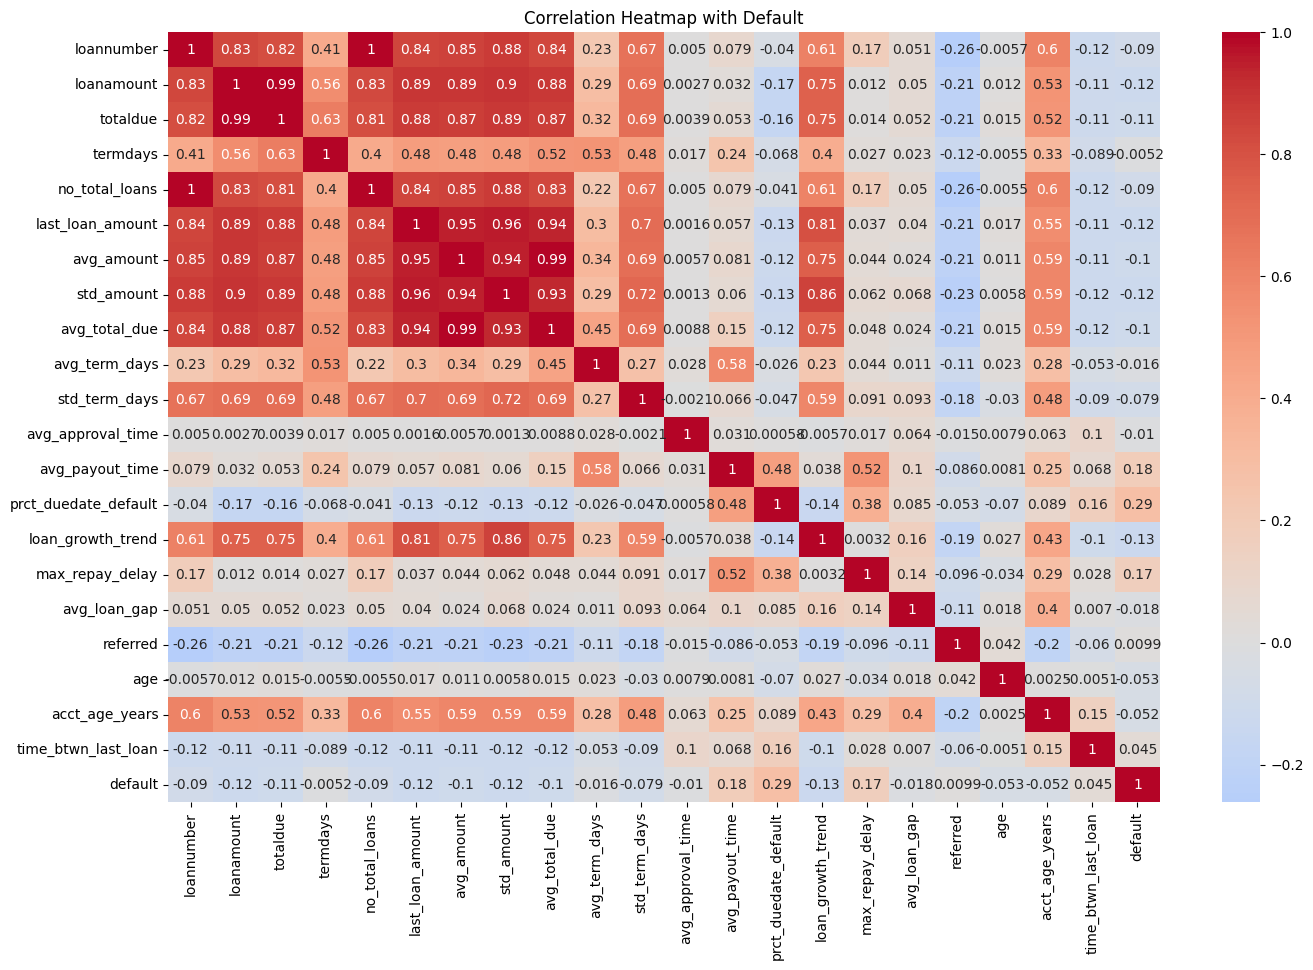

Correlation to Default Column:
default                 1.000000
prct_duedate_default    0.285149
avg_payout_time         0.183467
max_repay_delay         0.167009
time_btwn_last_loan     0.044504
referred                0.009859
termdays               -0.005160
avg_approval_time      -0.010391
avg_term_days          -0.015651
avg_loan_gap           -0.018270
acct_age_years         -0.051739
age                    -0.052982
std_term_days          -0.079013
no_total_loans         -0.089891
loannumber             -0.090487
avg_total_due          -0.101729
avg_amount             -0.104651
totaldue               -0.108357
loanamount             -0.115267
last_loan_amount       -0.116214
std_amount             -0.122446
loan_growth_trend      -0.127352
Name: default, dtype: float64


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_data = model_data.select_dtypes(include=["number"])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap with Default")
plt.show()

# Correlation with default column only
print("Correlation to Default Column:")
print(corr["default"].sort_values(ascending=False))


In [65]:
# loannumber and no_total_loans have a correlation of 1, meaning they are redundant

# check if the condition holds for all rows
check = (model_data["loannumber"] == model_data["no_total_loans"] + 1)

# see how many are True vs False
print("Loan number is Number of Total Loans + 1?")
print(check.value_counts())

# if you want to see rows where it fails:
invalid_rows = model_data[["loannumber", "no_total_loans"]][~check]
print("\nFirst 5 invalid rows: \n", invalid_rows.head())

print("\nFirst 5 valid rows: \n", model_data[["loannumber", "no_total_loans"]].head())

Loan number is Number of Total Loans + 1?
True     4337
False      31
Name: count, dtype: int64

First 5 invalid rows: 
      loannumber  no_total_loans
1             2             3.0
543           3             1.0
658           3             1.0
659           5             2.0
909           3             1.0

First 5 valid rows: 
    loannumber  no_total_loans
0          12            11.0
1           2             3.0
2           7             6.0
3           3             2.0
4           9             8.0


- Drop "no_total_loans" Column

In [66]:
model_data = model_data.drop(columns=["no_total_loans"])

model_data.describe()


,loannumber,loanamount,totaldue,termdays,last_loan_amount,avg_amount,std_amount,avg_total_due,avg_term_days,std_term_days,...,avg_payout_time,prct_duedate_default,loan_growth_trend,max_repay_delay,avg_loan_gap,referred,age,acct_age_years,time_btwn_last_loan,default
count,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,...,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000
mean,5.172390,17809.065934,21257.377679,29.261676,16442.307692,12903.510794,2672.052921,15634.426326,25.344588,3.470778,...,22.733198,0.184291,1068.267785,4.840888,10.319995,0.134386,40.449405,8.204441,13.406593,0.217949
std,3.653569,10749.694571,11943.510416,11.512519,10107.771243,4816.157410,3806.855208,5375.635651,6.860747,4.856460,...,9.394070,0.300718,1557.422749,13.752668,29.367884,0.341106,5.326200,0.403339,44.686471,0.412900
min,2.000000,10000.000000,10000.000000,15.000000,5000.000000,5000.000000,0.000000,5750.000000,15.000000,0.000000,...,0.000000,0.000000,-357.142900,0.000000,0.000000,0.000000,29.000000,8.000000,-9.000000,0.000000
25%,2.000000,10000.000000,13000.000000,30.000000,10000.000000,10000.000000,0.000000,12250.000000,20.000000,0.000000,...,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,8.000000,0.000000,0.000000
50%,4.000000,10000.000000,13000.000000,30.000000,10000.000000,10000.000000,0.000000,13000.000000,27.857143,0.000000,...,23.000000,0.000000,0.000000,0.000000,1.250000,0.000000,40.000000,8.000000,2.000000,0.000000
75%,7.000000,20000.000000,24500.000000,30.000000,20000.000000,14285.710000,4948.720000,17300.000000,30.000000,7.070000,...,28.458333,0.285714,2500.000000,4.000000,8.500000,0.000000,42.000000,8.000000,8.000000,0.000000
max,27.000000,60000.000000,68100.000000,90.000000,60000.000000,36666.670000,17083.230000,41252.380000,60.000000,29.050000,...,151.000000,1.000000,15000.000000,351.000000,439.000000,1.000000,63.000000,9.000000,526.000000,1.000000


In [67]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loannumber                 4368 non-null   int64  
 1   loanamount                 4368 non-null   float64
 2   totaldue                   4368 non-null   float64
 3   termdays                   4368 non-null   int64  
 4   bank_account_type          4368 non-null   object 
 5   bank_name_clients          4368 non-null   object 
 6   employment_status_clients  4368 non-null   object 
 7   last_loan_amount           4368 non-null   float64
 8   avg_amount                 4368 non-null   float64
 9   std_amount                 4368 non-null   float64
 10  avg_total_due              4368 non-null   float64
 11  avg_term_days              4368 non-null   float64
 12  std_term_days              4368 non-null   float64
 13  avg_approval_time          4368 non-null   float

##### **Add Some Other Features**

- **1. Credit Score**

In [68]:
# Feature Engineering for Credit Score

df = model_data.copy()

# --- Step 1: Encode employment_status_clients ---
employment_map = {
    "Permanent": 5,
    "Self-Employed": 4,
    "Contract": 3,
    "Student": 2,
    "Unemployed": 1,
    "Retired": 1,
    "Unknown": 0
}
df["employment_score"] = df["employment_status_clients"].map(employment_map)

# --- Step 2: Normalize numerical columns ---
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[["age", "acct_age_years", 
                                  "prct_duedate_default", "max_repay_delay"]])
df[["age_s", "acct_age_s", "due_default_s", "delay_s"]] = scaled

# --- Step 3: Weighted composite credit score ---
# You can adjust weights depending on domain
df["credit_score"] = (
    0.05 * df["age_s"] +
    0.1 * df["acct_age_s"] +
    0.45 * (1 - df["due_default_s"]) +   # lower default → better score
    0.3 * (1 - df["delay_s"]) +         # lower delay → better score
    0.1 * (df["employment_score"] / 5)  # scale employment to 0–1
)

# Scale final score to 0–100
df["credit_score"] = 5 * (df["credit_score"] - df["credit_score"].min()) / (df["credit_score"].max() - df["credit_score"].min())

df[["age","acct_age_years","prct_duedate_default","max_repay_delay","employment_status_clients","credit_score"]].head()


,age,acct_age_years,prct_duedate_default,max_repay_delay,employment_status_clients,credit_score
0,53.0,9,0.272727,39.0,Permanent,3.828959
1,40.0,8,0.000000,0.0,Permanent,4.082298
2,40.0,8,0.166667,30.0,Permanent,3.392146
3,47.0,8,1.000000,11.0,Permanent,1.002517
4,39.0,9,0.000000,0.0,Permanent,4.757969


In [69]:
model_data = model_data.assign(credit_score=df["credit_score"].reindex(model_data.index))
model_data.head()

,loannumber,loanamount,totaldue,termdays,bank_account_type,bank_name_clients,employment_status_clients,last_loan_amount,avg_amount,std_amount,...,loan_growth_trend,max_repay_delay,avg_loan_gap,referred,age,state,acct_age_years,time_btwn_last_loan,default,credit_score
0,12,30000.0,34500.0,30,Other,Diamond Bank,Permanent,20000.0,18181.82,5749.60,...,454.5455,39.0,2.0000,0,53.0,Lagos,9,0,0,3.828959
1,2,15000.0,17250.0,30,Savings,GT Bank,Permanent,10000.0,10000.00,0.00,...,0.0000,0.0,1.2500,0,40.0,Oyo,8,-5,0,4.082298
2,7,20000.0,22250.0,15,Other,EcoBank,Permanent,10000.0,10000.00,0.00,...,0.0000,30.0,9.4000,0,40.0,Gombe,8,41,0,3.392146
3,3,10000.0,11500.0,15,Savings,First Bank,Permanent,10000.0,10000.00,0.00,...,-0.0000,11.0,1.0000,0,47.0,Oyo,8,13,0,1.002517
4,9,40000.0,44000.0,30,Other,GT Bank,Permanent,30000.0,18750.00,7806.25,...,3214.2857,0.0,13.2857,0,39.0,Federal Capital Territory,9,0,0,4.757969


- **2. Merge Current Account into Others**

In [70]:
# Merge Current bank type to others

# merge 'Current' into 'Other'
model_data['bank_account_type'] = model_data['bank_account_type'].replace({'Current': 'Other'})

# check new distribution
model_data['bank_account_type'].value_counts()


bank_account_type
Savings    2570
Unknown    1099
Other       699
Name: count, dtype: int64

- **3. Loan Descriptions**

In [71]:
# 1. Debt-to-loan ratio
model_data['debt_to_loan_ratio'] = model_data['totaldue']/ model_data['loanamount']

# 2. Constant default (binary)
model_data['const_default'] = (model_data['prct_duedate_default'] > 0.4).astype(int)

# 3. Usual large loan (binary)
model_data['unusual_large'] = (model_data['loanamount'] > (model_data['avg_amount'] * 2)).astype(int)

# Preview
print(model_data[['debt_to_loan_ratio', 'const_default', 'unusual_large']].head(), "\n")
model_data[['debt_to_loan_ratio', 'const_default', 'unusual_large']].describe()

   debt_to_loan_ratio  const_default  unusual_large
0              1.1500              0              0
1              1.1500              0              0
2              1.1125              0              0
3              1.1500              1              0
4              1.1000              0              1 



,debt_to_loan_ratio,const_default,unusual_large
count,4368.000000,4368.000000,4368.000000
mean,1.217742,0.184295,0.038919
std,0.077056,0.387769,0.193425
min,1.000000,0.000000,0.000000
25%,1.150000,0.000000,0.000000
50%,1.225000,0.000000,0.000000
75%,1.300000,0.000000,0.000000
max,1.300000,1.000000,1.000000


##### **Save cleaned data 'model_data' to csv**

In [72]:
model_data.head()

,loannumber,loanamount,totaldue,termdays,bank_account_type,bank_name_clients,employment_status_clients,last_loan_amount,avg_amount,std_amount,...,referred,age,state,acct_age_years,time_btwn_last_loan,default,credit_score,debt_to_loan_ratio,const_default,unusual_large
0,12,30000.0,34500.0,30,Other,Diamond Bank,Permanent,20000.0,18181.82,5749.60,...,0,53.0,Lagos,9,0,0,3.828959,1.1500,0,0
1,2,15000.0,17250.0,30,Savings,GT Bank,Permanent,10000.0,10000.00,0.00,...,0,40.0,Oyo,8,-5,0,4.082298,1.1500,0,0
2,7,20000.0,22250.0,15,Other,EcoBank,Permanent,10000.0,10000.00,0.00,...,0,40.0,Gombe,8,41,0,3.392146,1.1125,0,0
3,3,10000.0,11500.0,15,Savings,First Bank,Permanent,10000.0,10000.00,0.00,...,0,47.0,Oyo,8,13,0,1.002517,1.1500,1,0
4,9,40000.0,44000.0,30,Other,GT Bank,Permanent,30000.0,18750.00,7806.25,...,0,39.0,Federal Capital Territory,9,0,0,4.757969,1.1000,0,1


In [73]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loannumber                 4368 non-null   int64  
 1   loanamount                 4368 non-null   float64
 2   totaldue                   4368 non-null   float64
 3   termdays                   4368 non-null   int64  
 4   bank_account_type          4368 non-null   object 
 5   bank_name_clients          4368 non-null   object 
 6   employment_status_clients  4368 non-null   object 
 7   last_loan_amount           4368 non-null   float64
 8   avg_amount                 4368 non-null   float64
 9   std_amount                 4368 non-null   float64
 10  avg_total_due              4368 non-null   float64
 11  avg_term_days              4368 non-null   float64
 12  std_term_days              4368 non-null   float64
 13  avg_approval_time          4368 non-null   float

In [ ]:
# Uncomment this cell to save your model_data to CSV
# model_data.to_csv("model_data.csv", index=False)